In [ ]:
# import pickle

# with open('history.pkl', 'wb') as f:
#     pickle.dump(history.history, f)


# with open('history.pkl', 'rb') as f:
#     history = pickle.load(f)

# libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

from keras.utils import np_utils
from keras.initializers import he_normal
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense , Activation
from keras import optimizers
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt

from keras.optimizers import RMSprop

# Dataset  (https://drive.google.com/drive/folders/1wpKwsOLlPnZ1kHe2-pQe813TW0QpalEu?usp=sharing)

In [ ]:
x_train = pd.read_csv(r"/content/drive/MyDrive/XOR_PUF/Original Files/train_6xor_64dim.csv", header = None)

In [ ]:
y_train = x_train[64]
x_train.drop([64], axis = 1, inplace = True)

In [ ]:
x_train.shape

(2000000, 64)

In [ ]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,1,1,-1,1,-1,-1,-1,1,1,-1,...,1,1,1,1,1,1,1,1,1,-1
1,-1,1,1,1,1,1,1,1,-1,-1,...,1,-1,1,-1,1,-1,1,1,-1,1
2,-1,-1,1,1,-1,1,1,1,1,-1,...,-1,1,-1,1,-1,1,-1,-1,-1,1
3,1,-1,-1,1,-1,1,1,1,-1,1,...,-1,1,-1,1,-1,1,-1,-1,1,-1
4,1,1,1,-1,-1,-1,-1,1,1,-1,...,1,-1,1,-1,1,-1,1,-1,-1,1


In [ ]:
y_train = y_train.replace(-1,0)

In [ ]:
x_test = pd.read_csv(r"/content/drive/MyDrive/XOR_PUF/Original Files/test_6xor_64dim.csv",header = None)

In [ ]:
y_test = x_test[64]
x_test.drop([64], axis = 1, inplace = True)

In [ ]:
x_test.shape

(400000, 64)

In [ ]:
x_test.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-1,-1,1,1,-1,1,1,1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
1,1,1,-1,1,-1,-1,1,1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,1,1,-1
2,1,1,1,-1,1,1,-1,1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,1,1,1
3,1,-1,1,-1,-1,-1,-1,-1,-1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,-1,1,-1,1,-1,-1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
y_test = y_test.replace(-1,0)

In [ ]:
y_test.head()

0    0
1    1
2    1
3    1
4    0
Name: 64, dtype: int64

# Logisitic regression

In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(x_test)
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.50101


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[100587,  99985],
       [ 99611,  99817]])

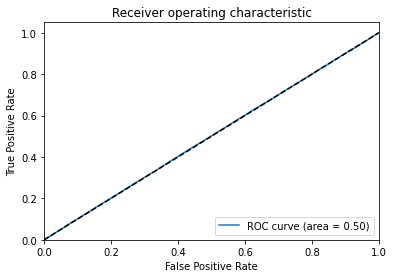

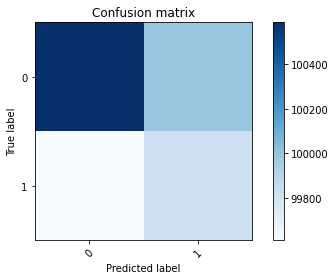

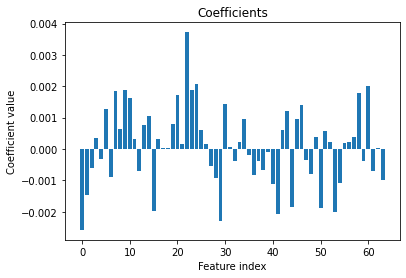

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Get the predicted probabilities for the test set
y_pred_prob = logreg.predict_proba(x_test)[:,1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix
y_pred = logreg.predict(x_test)
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure()
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'], rotation=45)
plt.yticks(tick_marks, ['0', '1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

# Plot coefficients
coefs = logreg.coef_
plt.figure()
plt.bar(range(len(coefs[0])), coefs[0])
plt.title('Coefficients')
plt.xlabel('Feature index')
plt.ylabel('Coefficient value')
plt.show()


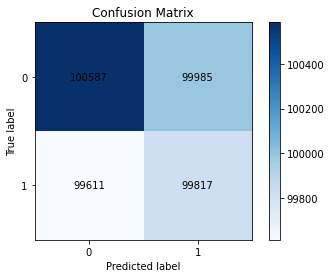

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
classes = [0, 1]

# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Add title and axis labels
ax.set(title="Confusion Matrix", xlabel="Predicted label", ylabel="True label")


# Show all ticks
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       xlim=(-0.5, len(classes)-0.5), ylim=(len(classes)-0.5, -0.5),
       aspect='equal')

# Add text annotations
for i in range(len(classes)):
    for j in range(len(classes)):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

# Show plot
plt.show()

# randome forest

In [ ]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Train a decision tree algorithm
random_forest = DecisionTreeClassifier(random_state=42)
random_forest.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = random_forest.predict(x_test)

# Evaluate the accuracy of the decision tree algorithm
accuracy_dt = accuracy_score(y_test, y_pred)
print("Decision tree accuracy:", accuracy)

Decision tree accuracy: 0.50101


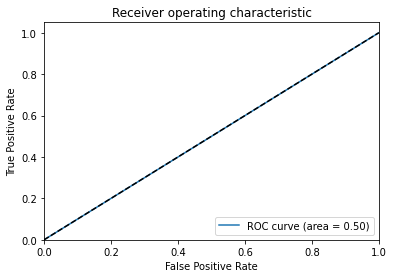

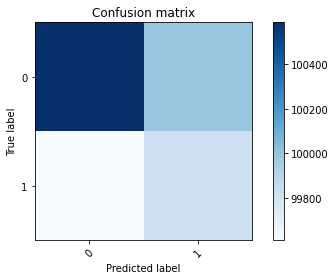

In [ ]:
# Get the predicted probabilities for the test set
y_pred_prob = random_forest.predict_proba(x_test)[:,1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix
y_pred = logreg.predict(x_test)
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure()
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'], rotation=45)
plt.yticks(tick_marks, ['0', '1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

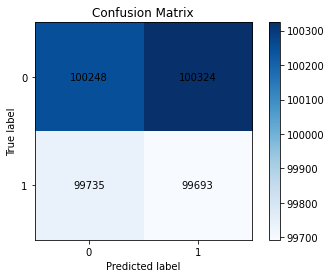

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
classes = [0, 1]

# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Add title and axis labels
ax.set(title="Confusion Matrix", xlabel="Predicted label", ylabel="True label")


# Show all ticks
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       xlim=(-0.5, len(classes)-0.5), ylim=(len(classes)-0.5, -0.5),
       aspect='equal')

# Add text annotations
for i in range(len(classes)):
    for j in range(len(classes)):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

# Show plot
plt.show()

# ANN model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model architecture
model = Sequential()
model.add(Dense(32, input_dim=64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_checkpoint = ModelCheckpoint("/content/drive/MyDrive/final_model.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1)


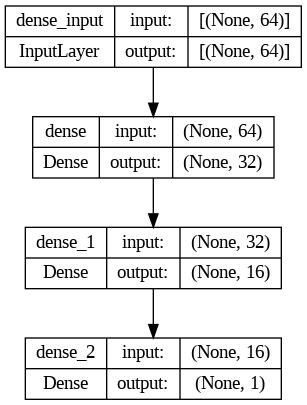

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, callbacks=[model_checkpoint])

Epoch 1/50
62493/62500 [============================>.] - ETA: 0s - loss: 0.6935 - accuracy: 0.5000
Epoch 1: val_accuracy improved from -inf to 0.49857, saving model to /content/drive/MyDrive/final_model.hdf5
62500/62500 [==============================] - 146s 2ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4986
Epoch 2/50
62490/62500 [============================>.] - ETA: 0s - loss: 0.6898 - accuracy: 0.5085
Epoch 2: val_accuracy improved from 0.49857 to 0.52873, saving model to /content/drive/MyDrive/final_model.hdf5
62500/62500 [==============================] - 144s 2ms/step - loss: 0.6898 - accuracy: 0.5085 - val_loss: 0.6773 - val_accuracy: 0.5287
Epoch 3/50
62486/62500 [============================>.] - ETA: 0s - loss: 0.6614 - accuracy: 0.5416
Epoch 3: val_accuracy improved from 0.52873 to 0.54641, saving model to /content/drive/MyDrive/final_model.hdf5
62500/62500 [==============================] - 141s 2ms/step - loss: 0.6614 - accuracy: 0.541

In [ ]:
import pickle

with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

In [ ]:
y_pred = model.predict(x_test)

12500/12500 [==============================] - 18s 1ms/step


In [ ]:
y_pred_list = y_pred.tolist()

In [ ]:
y_pred_target= []
for i in y_pred_list:
  if(i[0]>0.5):
    y_pred_target.append(1)
  else:
    y_pred_target.append(0)

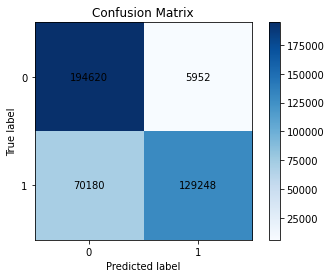

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_target)

# Define class labels
classes = [0, 1]

# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Add title and axis labels
ax.set(title="Confusion Matrix", xlabel="Predicted label", ylabel="True label")


# Show all ticks
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       xlim=(-0.5, len(classes)-0.5), ylim=(len(classes)-0.5, -0.5),
       aspect='equal')

# Add text annotations
for i in range(len(classes)):
    for j in range(len(classes)):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

# Show plot
plt.show()

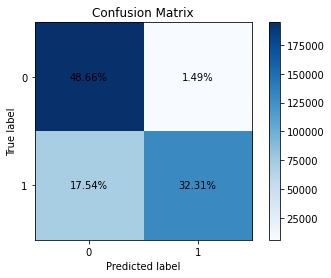

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_target)

# Define class labels
classes = [0, 1]

# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Add title and axis labels
ax.set(title="Confusion Matrix", xlabel="Predicted label", ylabel="True label")


# Show all ticks
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       xlim=(-0.5, len(classes)-0.5), ylim=(len(classes)-0.5, -0.5),
       aspect='equal')

# Add text annotations
for i in range(len(classes)):
    for j in range(len(classes)):
        ax.text(j, i, "{:.2f}%".format((cm[i, j]/(400000))*100), ha='center', va='center', color='black')

# Show plot
plt.show()

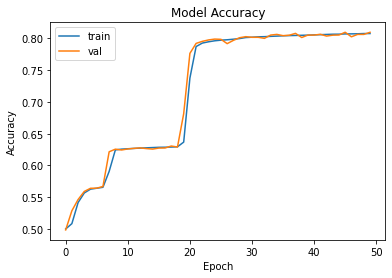

In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

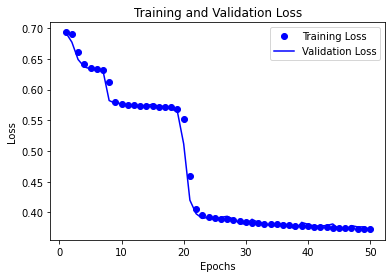

In [ ]:
import matplotlib.pyplot as plt

# Get the training and validation loss from the model history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a plot of training and validation loss over epochs
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


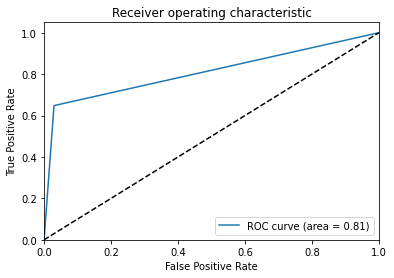

In [ ]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_target)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

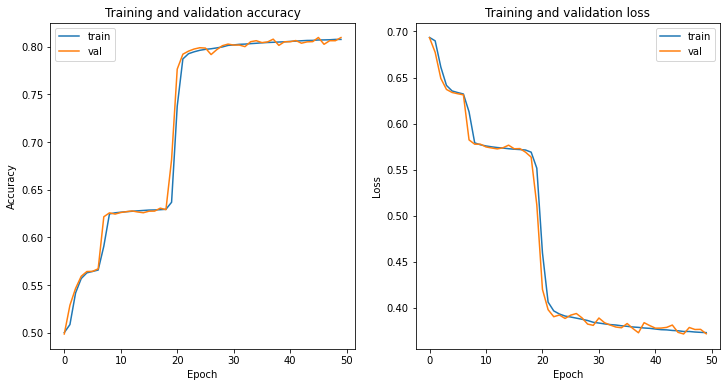

In [ ]:
# Get training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot learning curves
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(train_acc, label='train')
ax[0].plot(val_acc, label='val')
ax[0].set_title('Training and validation accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(train_loss, label='train')
ax[1].plot(val_loss, label='val')
ax[1].set_title('Training and validation loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.show()


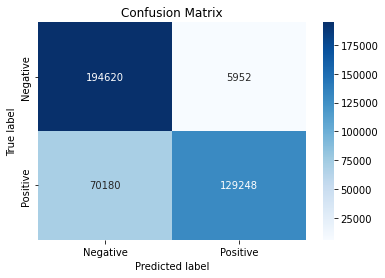

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_target)

# Plot confusion matrix using heatmap
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


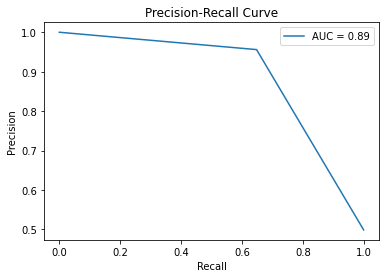

In [ ]:
from sklearn.metrics import precision_recall_curve

# Get predictions from model
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_target)

# Compute the area under the curve (AUC)
auc_score = auc(recall, precision)

# Plot the precision-recall curve
plt.plot(recall, precision, label='AUC = {:.2f}'.format(auc_score))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


# hamming code approach

In [ ]:
BIN = []
base = "0"*64

In [ ]:
x_train_hamming = x_train.replace(-1,0).values.tolist()
x_test_hamming = x_test.replace(-1,0).values.tolist()

In [ ]:
def hamming_distance(str1, str2):
    # Convert strings to integers
    num1 = int(str1, 2)
    num2 = int(str2, 2)

    # Calculate bitwise XOR
    xor = num1 ^ num2

    # Convert XOR result to binary string and count number of different bits
    return bin(xor).count('1')

In [ ]:
# calculating the hamming distance for x_train
for i in range(len(x_train_hamming)):
  string = "".join(str(j) for j in x_train_hamming[i])
  x_train_hamming[i] = [x_train_hamming[i],hamming_distance(string,base)]

In [ ]:
# calculating the hamming distance for x_test
for i in range(len(x_test_hamming)):
  string = "".join(str(j) for j in x_test_hamming[i])
  x_test_hamming[i] = [x_test_hamming[i],hamming_distance(string,base)]

In [ ]:
for hexa_code in x_train_hamming:
  for i in range(len(hexa_code)):
    if(hexa_code[i]== -1):
      hexa_code[i] = 0

In [ ]:
data_spread_train = []
for i in x_train_hamming:
  data_spread_train.append(i[1])

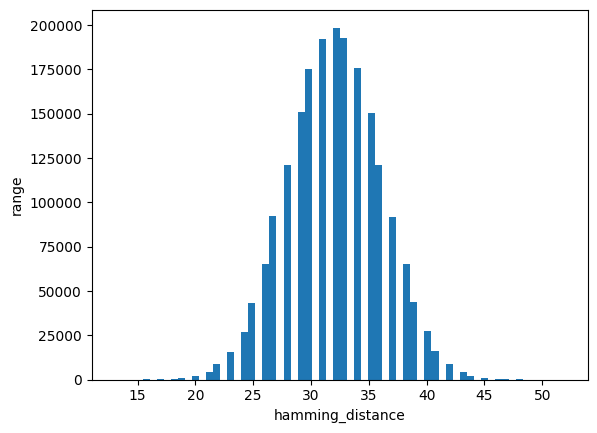

In [ ]:
plt.hist(data_spread_train, bins= 64)
plt.xlabel('hamming_distance')
plt.ylabel('range')
plt.show()

In [ ]:
data_spread_test = []
for i in x_test_hamming:
  data_spread_test.append(i[1])

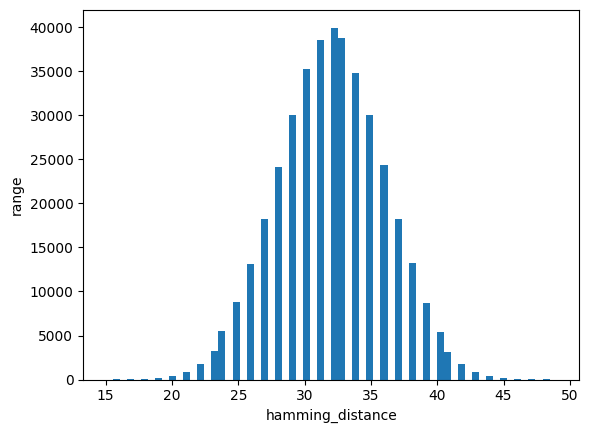

In [ ]:
plt.hist(data_spread_test, bins=64)
plt.xlabel('hamming_distance')
plt.ylabel('range')
plt.show()

In [ ]:
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec

Text(0.0, 1.0, 'Histogram of Space Missions Costs (Millions of USD)')

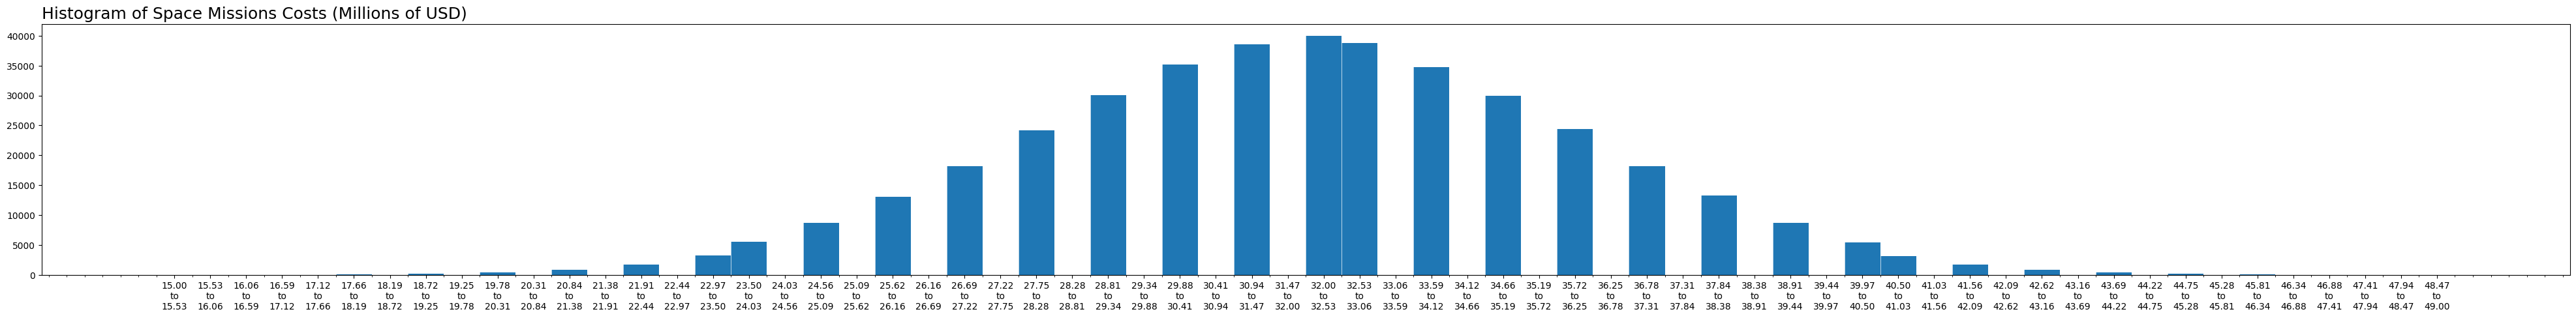

In [ ]:
fig = plt.figure(figsize=(50,5))
n, bins, patches = plt.hist(data_spread_test,bins=64)
# define minor ticks and draw a grid with them
minor_locator = AutoMinorLocator(2)
plt.gca().xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor', color='white', lw = 0.5)
# x ticks
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:.2f}\nto\n{:.2f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)
plt.title('Histogram of Space Missions Costs (Millions of USD)', loc = 'left', fontsize = 18)